In [16]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import glob
from glob import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import h5py
import pickle

dataset = pd.read_csv('driver_imgs_list.csv')
dataset.head(5)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [4]:
# Groupby subjects
by_drivers = dataset.groupby('subject') 
# Groupby unique drivers
unique_drivers = by_drivers.groups.keys() # drivers id
print('There are : ',len(unique_drivers), ' unique drivers')
print('There is a mean of ',round(dataset.groupby('subject').count()['classname'].mean()), ' images by driver.')

There are :  26  unique drivers
There is a mean of  862  images by driver.


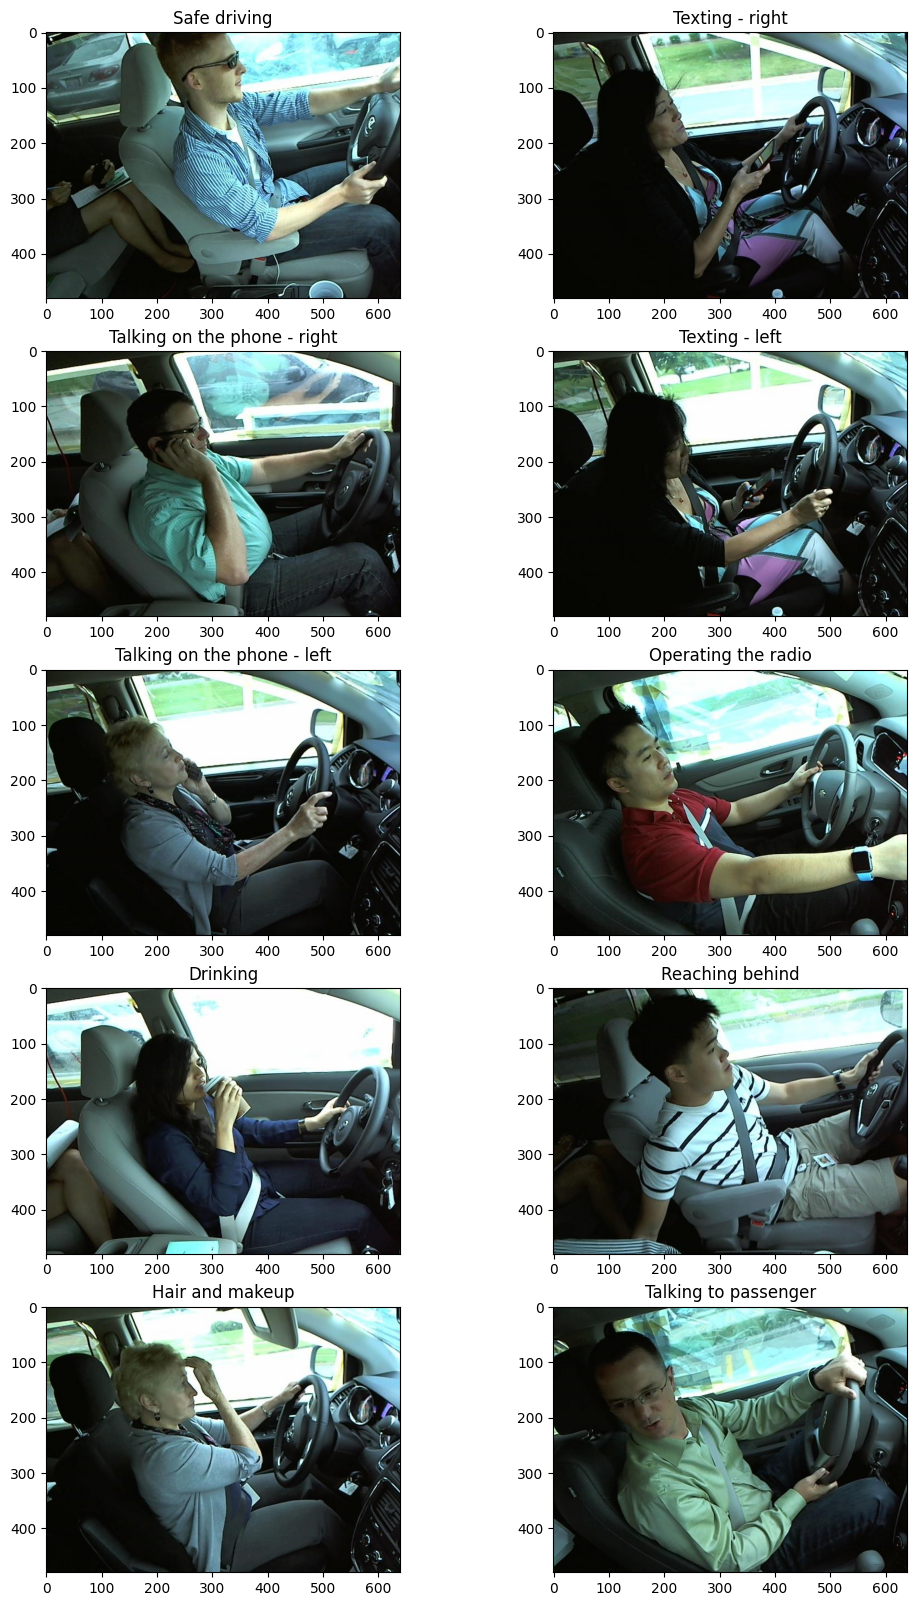

In [5]:
activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}
plt.figure(figsize = (12, 20))
image_count = 1
BASE_URL = 'imgs/train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                fig = plt.subplot(5, 2, image_count)
                image_count += 1
                image = mpimg.imread(BASE_URL + directory + '/' + file)
                plt.imshow(image)
                plt.title(activity_map[directory])

C:\Users\hp\AppData\Local\Temp\ipykernel_18516\3038481671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'classname', data = dataset, palette='Set2')


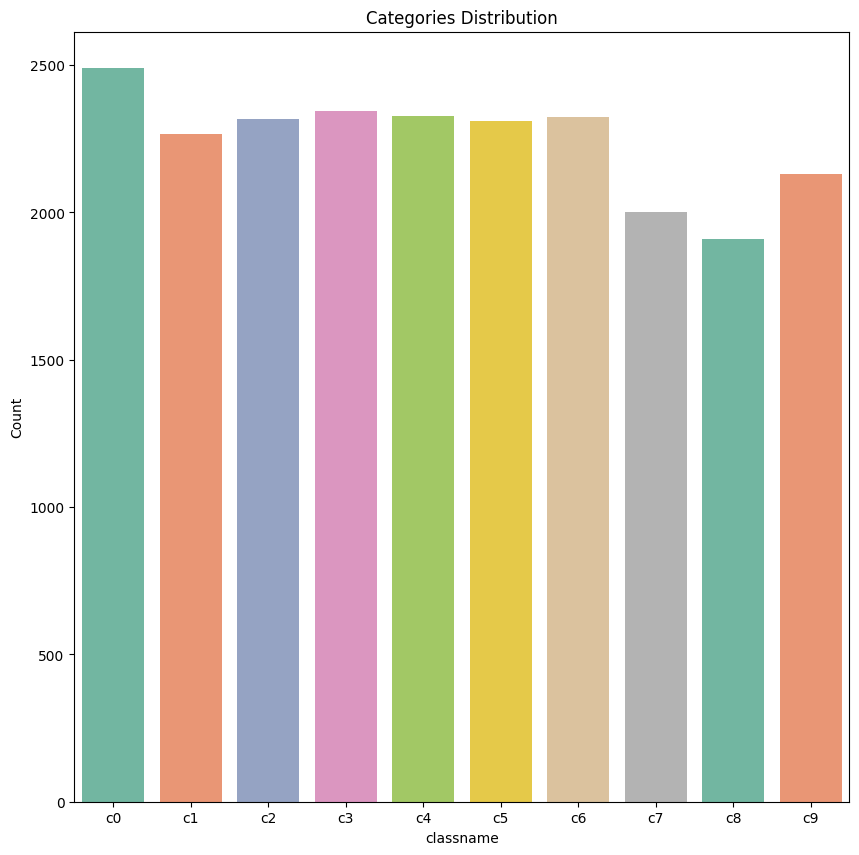

In [6]:
# Plot figure size
plt.figure(figsize = (10,10))
# Count the number of images per category
sns.countplot(x = 'classname', data = dataset, palette='Set2')
# Change the Axis names
plt.ylabel('Count')
plt.title('Categories Distribution')
# Show plot
plt.show()

In [9]:

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predict on validation set
y_val_pred = clf.predict(X_val.reshape(X_val.shape[0], -1))

# Calculate accuracy on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Save the trained model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(clf, f)



Validation Accuracy: 99.05%
Final training set size: 16145 images
Final validation set size: 1794 images
Final testing set size: 4485 images


In [22]:
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
y_test_pred = clf.predict(X_test_reshaped)
report = classification_report(y_test, y_test_pred, target_names=[f'Class {i}' for i in range(10)])
print(report)

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       498
     Class 1       1.00      1.00      1.00       453
     Class 2       1.00      1.00      1.00       464
     Class 3       0.99      0.99      0.99       469
     Class 4       0.99      0.99      0.99       465
     Class 5       1.00      0.99      0.99       463
     Class 6       0.99      0.99      0.99       465
     Class 7       0.99      0.99      0.99       400
     Class 8       1.00      0.98      0.99       382
     Class 9       0.99      0.99      0.99       426

    accuracy                           0.99      4485
   macro avg       0.99      0.99      0.99      4485
weighted avg       0.99      0.99      0.99      4485



Confusion Matrix:
 [[494   1   0   3   0   0   0   0   0   0]
 [  0 453   0   0   0   0   0   0   0   0]
 [  0   0 463   0   0   0   0   0   0   1]
 [  2   0   0 464   3   0   0   0   0   0]
 [  0   1   0   1 463   0   0   0   0   0]
 [  0   0   0   0   2 460   1   0   0   0]
 [  1   1   0   0   0   1 462   0   0   0]
 [  2   0   0   0   0   0   0 396   1   1]
 [  2   0   2   1   1   0   2   0 368   6]
 [  1   2   0   0   1   0   0   0   1 421]]


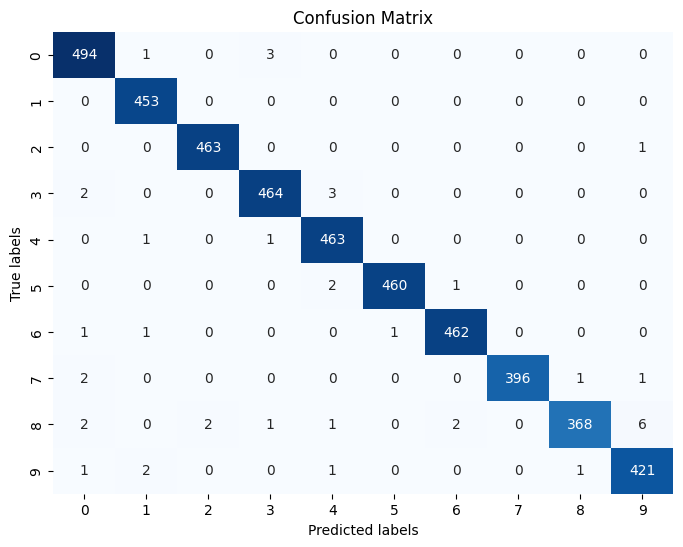

In [21]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predict on validation set
y_val_pred1 = clf1.predict(X_val.reshape(X_val.shape[0], -1))

# Calculate accuracy on validation set
val_accuracy1 = accuracy_score(y_val, y_val_pred1)
print(f'Validation Accuracy: {val_accuracy1 * 100:.2f}%')

# Test the model
y_test_pred1 = clf1.predict(X_test.reshape(X_test.shape[0], -1))

# Print classification report
report1 = classification_report(y_test, y_test_pred1, target_names=[f'Class {i}' for i in range(10)])
print(report1)

Validation Accuracy: 86.23%
              precision    recall  f1-score   support

     Class 0       0.85      0.84      0.85       498
     Class 1       0.86      0.88      0.87       453
     Class 2       0.84      0.88      0.86       464
     Class 3       0.84      0.88      0.86       469
     Class 4       0.86      0.85      0.85       465
     Class 5       0.94      0.92      0.93       463
     Class 6       0.81      0.83      0.82       465
     Class 7       0.87      0.83      0.85       400
     Class 8       0.81      0.79      0.80       382
     Class 9       0.83      0.81      0.82       426

    accuracy                           0.85      4485
   macro avg       0.85      0.85      0.85      4485
weighted avg       0.85      0.85      0.85      4485



Confusion Matrix:
 [[418   8   5  15  11   1   8   8   6  18]
 [  2 397  11   9   5   5  10   2   5   7]
 [ 12   5 407   6   4   3  14   5   4   4]
 [ 11   4   4 413  19   1   3   3   3   8]
 [ 12   7   8  18 395   3   7   2  10   3]
 [  4   1   3   5   4 425   7   8   2   4]
 [  6  25  17   4   4   3 386   3  14   3]
 [  5   5  14   1   4   2  16 333  11   9]
 [  8   7   9   9   4   3  16   8 303  15]
 [ 13   3   4   9  10   5   7  11  17 347]]


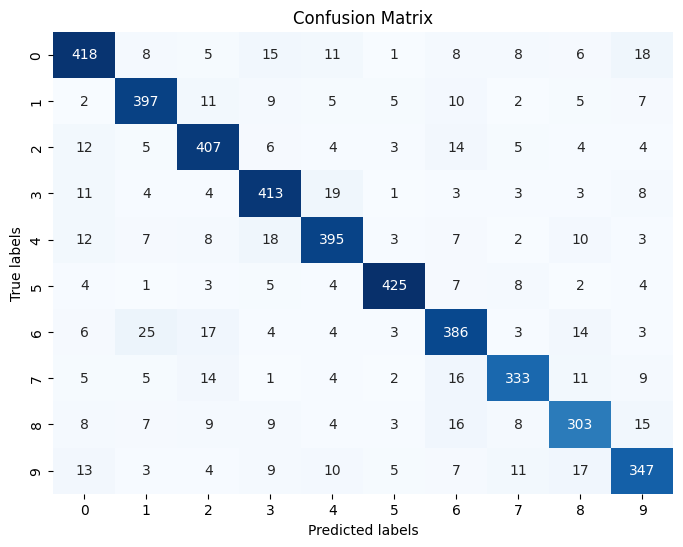

In [25]:
conf_matrix = confusion_matrix(y_test, y_test_pred1)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
clf2 = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
clf2.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predict on validation set
y_val_pred2 = clf2.predict(X_val.reshape(X_val.shape[0], -1))

# Calculate accuracy on validation set
val_accuracy2 = accuracy_score(y_val, y_val_pred2)
print(f'Validation Accuracy: {val_accuracy2 * 100:.2f}%')

# Test the model
y_test_pred2 = clf2.predict(X_test.reshape(X_test.shape[0], -1))

# Print classification report
report2 = classification_report(y_test, y_test_pred2, target_names=[f'Class {i}' for i in range(10)])
print(report2)

Validation Accuracy: 98.77%
              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       498
     Class 1       0.99      1.00      0.99       453
     Class 2       1.00      1.00      1.00       464
     Class 3       0.99      0.99      0.99       469
     Class 4       0.99      1.00      0.99       465
     Class 5       1.00      0.99      1.00       463
     Class 6       0.99      0.99      0.99       465
     Class 7       1.00      0.99      0.99       400
     Class 8       0.99      0.96      0.98       382
     Class 9       0.98      0.99      0.98       426

    accuracy                           0.99      4485
   macro avg       0.99      0.99      0.99      4485
weighted avg       0.99      0.99      0.99      4485



Confusion Matrix:
 [[494   1   0   3   0   0   0   0   0   0]
 [  0 453   0   0   0   0   0   0   0   0]
 [  0   0 463   0   0   0   0   0   0   1]
 [  2   0   0 464   3   0   0   0   0   0]
 [  0   1   0   1 463   0   0   0   0   0]
 [  0   0   0   0   2 460   1   0   0   0]
 [  1   1   0   0   0   1 462   0   0   0]
 [  2   0   0   0   0   0   0 396   1   1]
 [  2   0   2   1   1   0   2   0 368   6]
 [  1   2   0   0   1   0   0   0   1 421]]


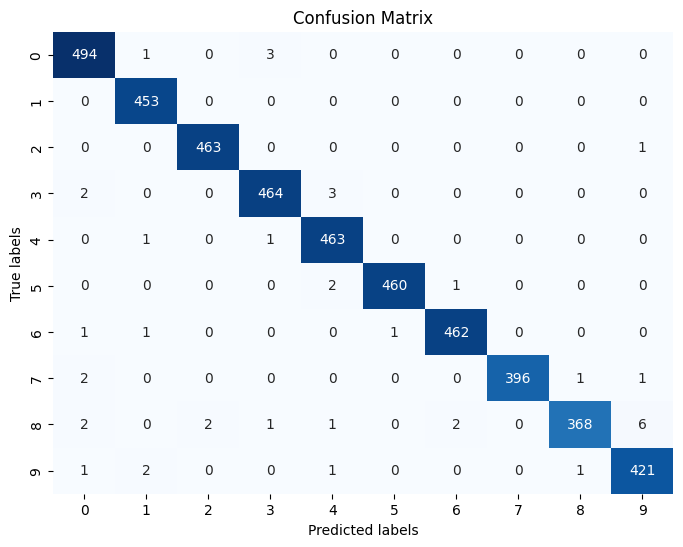

In [27]:
conf_matrix = confusion_matrix(y_test, y_test_pred2)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

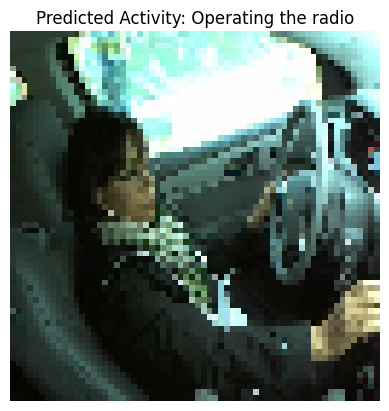

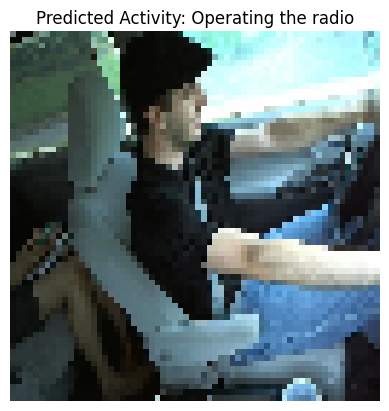

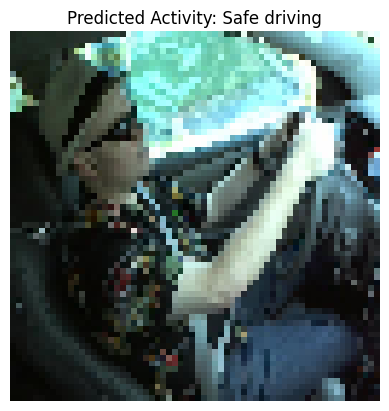

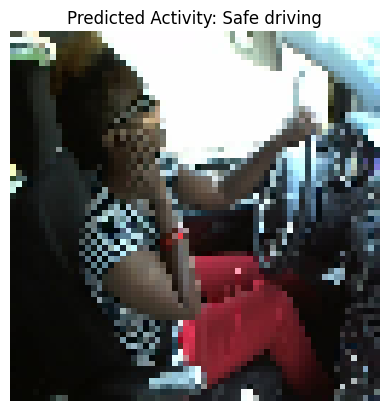

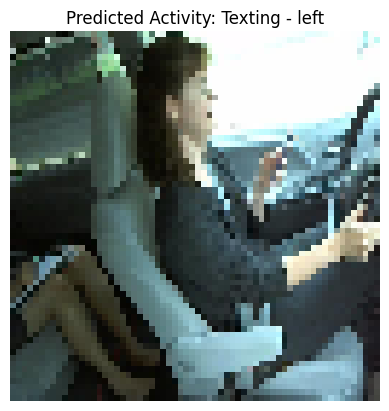

In [28]:
def load_and_preprocess_image(image_path, target_size=(64, 64)):
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.resize(image, target_size)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        return image
    else:
        raise ValueError(f"Image not found or cannot be opened: {image_path}")


test_images_path = 'imgs/test/*.jpg'

# Load all test images
test_image_paths = glob(test_images_path)

# Limit the number of test images to process
num_images_to_predict = 5

# Predict and display results for the first 5 test images
for idx, image_path in enumerate(test_image_paths[:num_images_to_predict]):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)
    image_reshaped = image.reshape(1, -1)

    # Predict the class of the image
    predicted_class_idx = clf.predict(image_reshaped)[0]
    predicted_class_label = f'c{predicted_class_idx}'
    predicted_activity = activity_map[predicted_class_label]

    # Display the image and the predicted activity
    plt.imshow(image)
    plt.title(f'Predicted Activity: {predicted_activity}')
    plt.axis('off')
    plt.show()

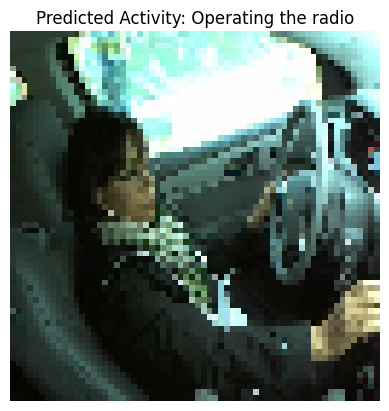

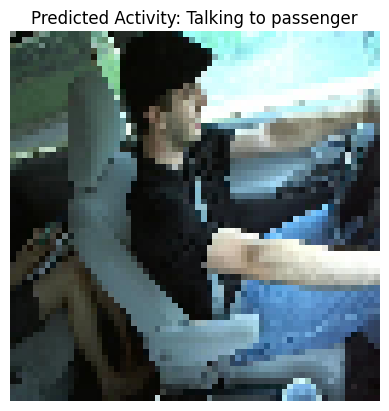

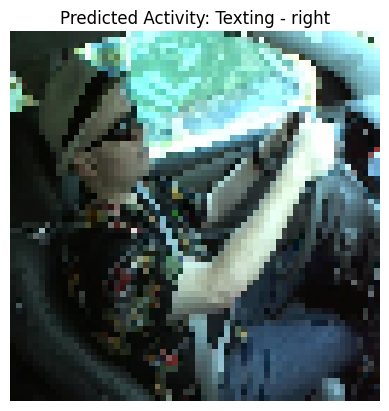

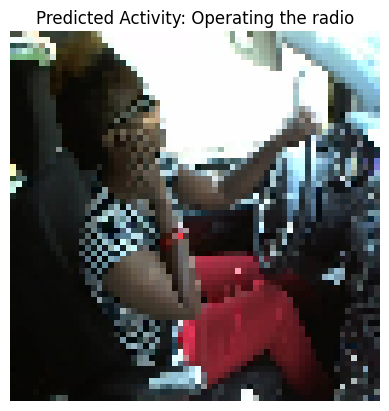

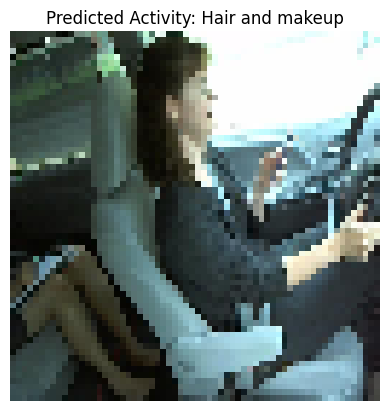

In [31]:
# Predict and display results for the first 5 test images
for idx, image_path in enumerate(test_image_paths[:num_images_to_predict]):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)
    image_reshaped = image.reshape(1, -1)

    # Predict the class of the image
    predicted_class_idx = clf1.predict(image_reshaped)[0]
    predicted_class_label = f'c{predicted_class_idx}'
    predicted_activity = activity_map[predicted_class_label]

    # Display the image and the predicted activity
    plt.imshow(image)
    plt.title(f'Predicted Activity: {predicted_activity}')
    plt.axis('off')
    plt.show()

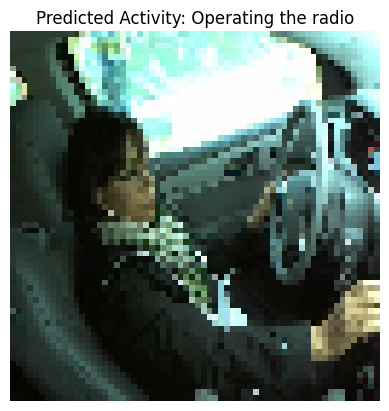

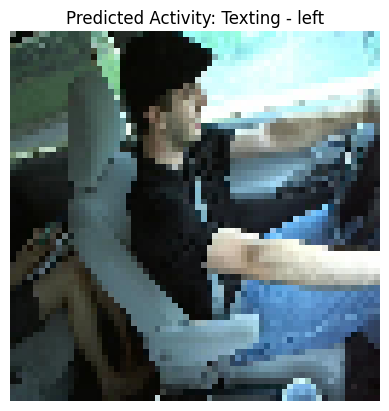

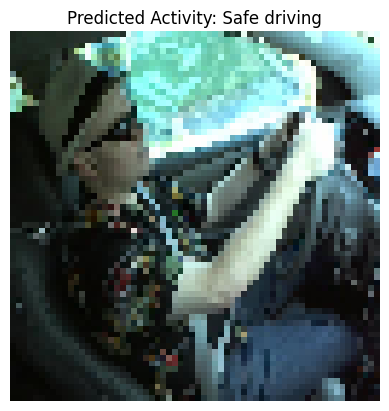

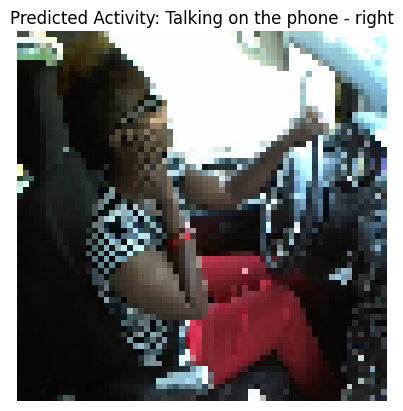

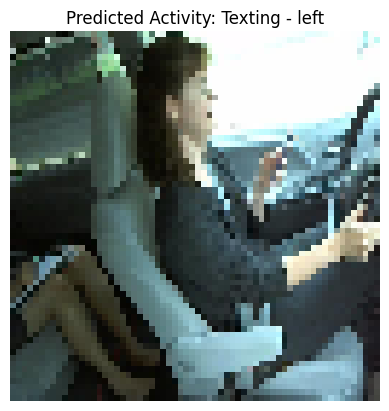

In [30]:
# Predict and display results for the first 5 test images
for idx, image_path in enumerate(test_image_paths[:num_images_to_predict]):
    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)
    image_reshaped = image.reshape(1, -1)

    # Predict the class of the image
    predicted_class_idx = clf2.predict(image_reshaped)[0]
    predicted_class_label = f'c{predicted_class_idx}'
    predicted_activity = activity_map[predicted_class_label]

    # Display the image and the predicted activity
    plt.imshow(image)
    plt.title(f'Predicted Activity: {predicted_activity}')
    plt.axis('off')
    plt.show()